<h1>Analyse des différents Modèle</h1>

<h2>Acquisition du DataFrame de toutes les configurations testées.</h2>

In [86]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# listdir = os.listdir("report")
# for file in listdir:
#     os.rename("report/"+file, "report/"+file.replace("0per", "0_per"))

In [105]:
df_list = list()

listdir = os.listdir("report")
for file in listdir:
    if ("feat_importance" not in file) and (file[-3:]=="csv"):
        split = file.split(".")[0]
        split = split.split("_")
        n_class = int(split[0])
        split_size = int(split[split.index("perclass")-1])
        mindf = int(split[split.index("mindf")+1])
        is_vectorize = "vectorize" in split
        is_daydiff = "daydiff" in split
        is_meta = "meta" in split
        dfi = pd.read_csv(f"report/{file}")
        dfi["n_class"] = n_class
        dfi["split_size"] = split_size
        dfi["mindf"] = mindf
        dfi["is_vectorize"] = is_vectorize
        dfi["is_daydiff"] = is_daydiff
        dfi["is_meta"] = is_meta
        df_list.append(dfi)
df = pd.concat(df_list, axis=0, ignore_index=True)
df.rename(columns={"Unnamed: 0":"Model"}, inplace=True)



In [106]:
df.replace({"XGOOST" : "XGBoost",
"xGboot->LogCat" : "XGBoost -> LogCat"}, inplace=True)

<h2>Impact du nombre d'observations par classe</h2>

,Model,Accuracy,RMSE,MAE,RMSE_class_0,MAE_class_0,Precision_class_0,Recall_class_0,F1_class_0,RMSE_class_1,...,RMSE_class_4,MAE_class_4,Precision_class_4,Recall_class_4,F1_class_4,RMSE_class_5,MAE_class_5,Precision_class_5,Recall_class_5,F1_class_5
63,XGBOOST,0.856455,0.378874,0.143545,0.355189,0.126159,0.887656,0.873841,0.880694,0.412700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,XGBOOST_2_classes,0.865890,0.366210,0.134110,0.307737,0.094702,0.877407,0.905298,0.891134,0.441360,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,RandomForest,0.849227,0.388295,0.150773,0.350968,0.123179,0.874794,0.876821,0.875806,0.439623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,XGBoost -> LogCat,0.857258,0.377813,0.142742,0.316228,0.100000,0.869204,0.900000,0.884334,0.456691,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,XGBOOST,0.760000,0.489898,0.240000,0.411693,0.169492,0.777778,0.830508,0.803279,0.584349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,XGBOOST_2_classes,0.820000,0.424264,0.180000,0.291111,0.084746,0.805970,0.915254,0.857143,0.563093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,RandomForest,0.770000,0.479583,0.230000,0.390567,0.152542,0.781250,0.847458,0.813008,0.584349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,XGBoost -> LogCat,0.790000,0.458258,0.210000,0.291111,0.084746,0.771429,0.915254,0.837209,0.624695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,XGBOOST,0.843373,0.395761,0.156627,0.359359,0.129139,0.870861,0.870861,0.870861,0.446071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,XGBOOST_2_classes,0.869478,0.361278,0.130522,0.304492,0.092715,0.881029,0.907285,0.893964,0.434483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


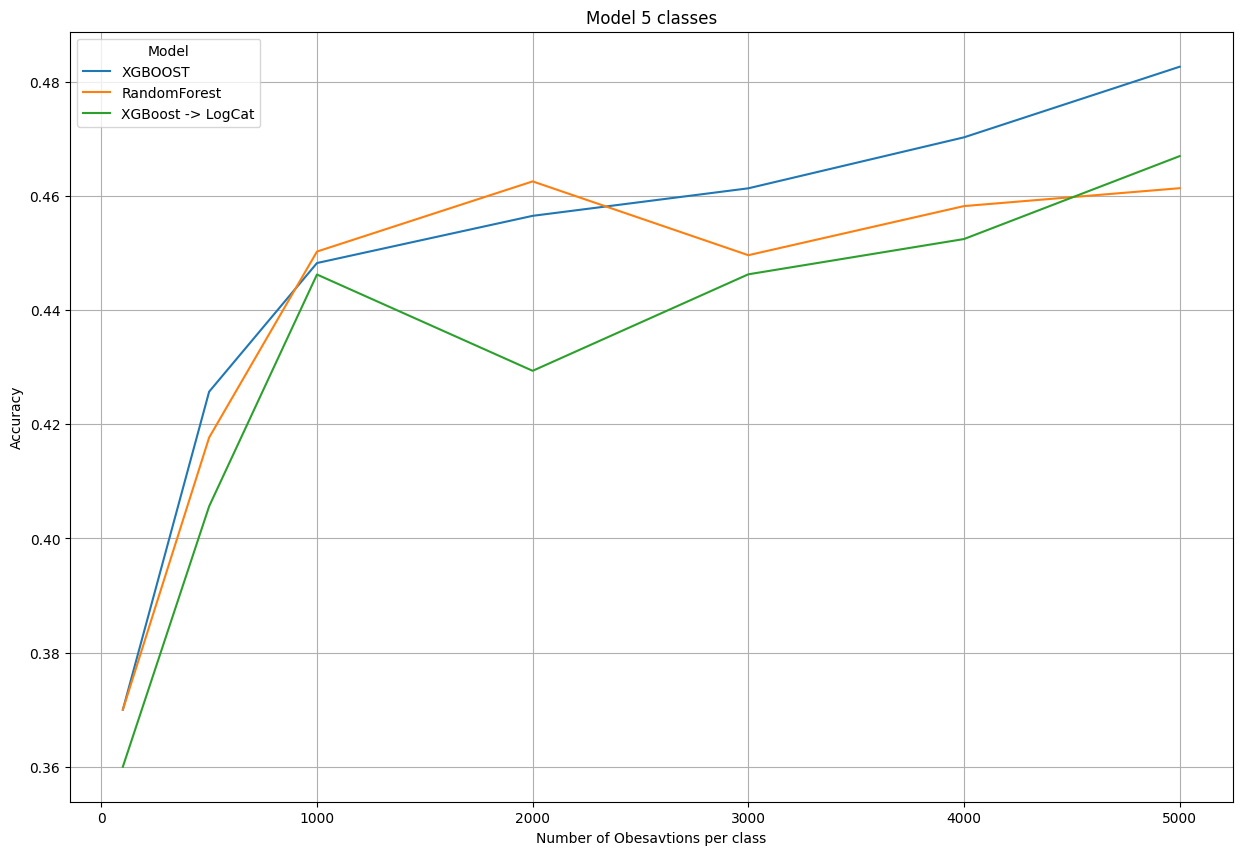

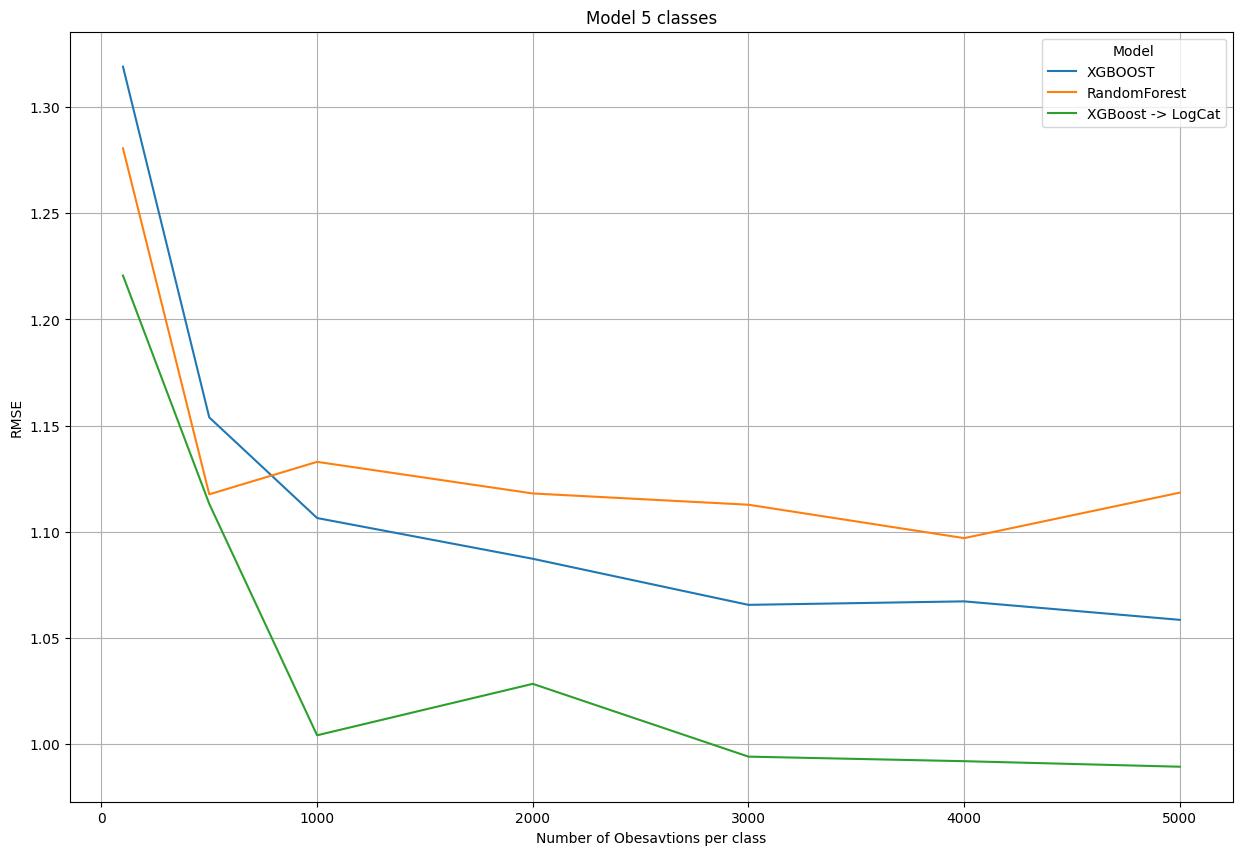

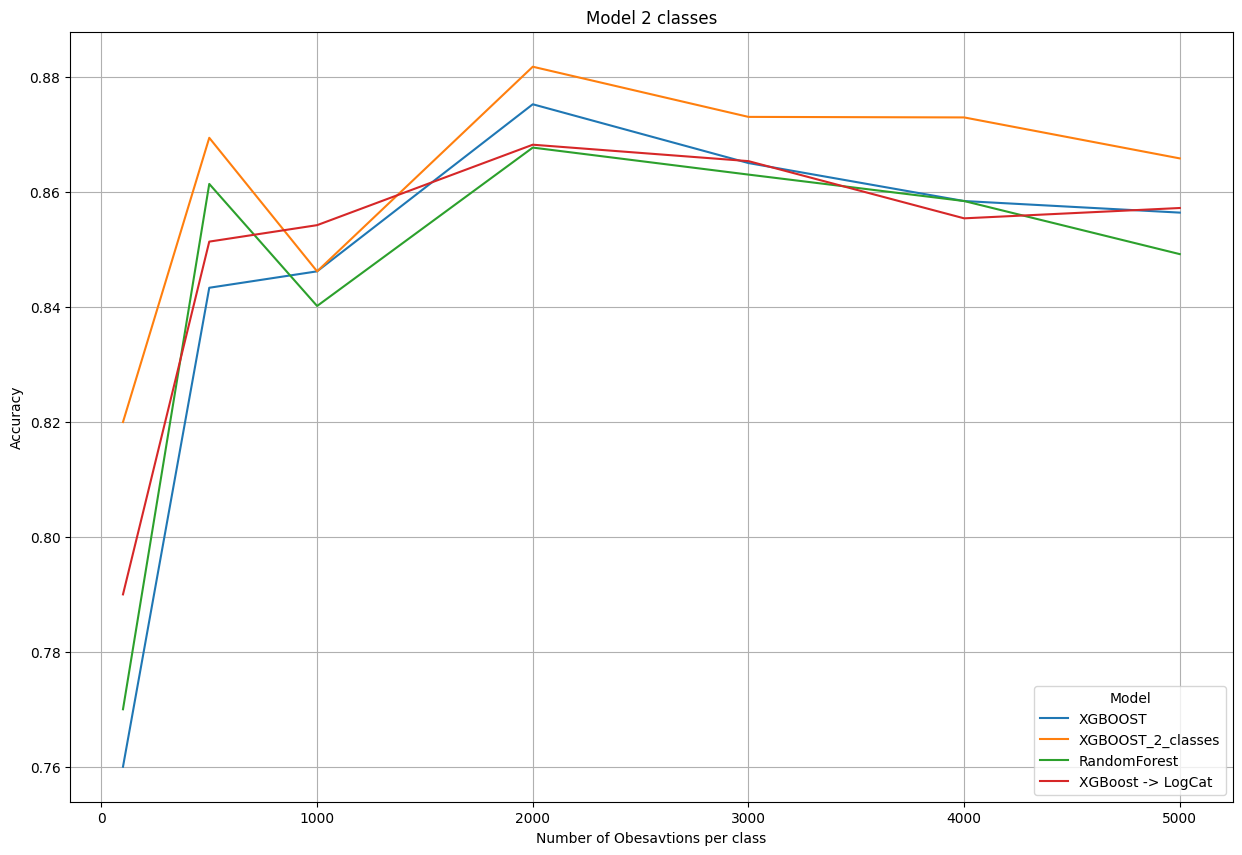

In [107]:
mask = (df["is_vectorize"]==True) & (df["is_daydiff"]==True) & (df["is_meta"] == True) & (df["Model"]!="XGBOOST_TRAIN")  & (df["mindf"]==15)
df2 = df.rename(columns={"split_size":"Number of Obesavtions per class"})
# 5 class
mask2 = df2["n_class"] == 5
plt.figure(figsize=(15, 10))
sns.lineplot(x="Number of Obesavtions per class", y="Accuracy", hue="Model" , data=df2[mask & mask2])
plt.grid()
plt.title("Model 5 classes")

mask2 = df["n_class"] == 5
plt.figure(figsize=(15, 10))
sns.lineplot(x="Number of Obesavtions per class", y="RMSE", hue="Model" , data=df2[mask & mask2])
plt.grid()
plt.title("Model 5 classes")

# 2 class
mask2 = df["n_class"] == 2
plt.figure(figsize=(15, 10))
sns.lineplot(x="Number of Obesavtions per class", y="Accuracy", hue="Model" , data=df2[mask & mask2])
plt.grid()
plt.title("Model 2 classes")

display(df[mask & mask2])

In [113]:
# On se concentre sur 5000 classes
df = df[df["split_size"]==5000]

<h2>Impact du mindf</h2>

,Model,Accuracy,RMSE,MAE,RMSE_class_0,MAE_class_0,Precision_class_0,Recall_class_0,F1_class_0,RMSE_class_1,...,RMSE_class_4,MAE_class_4,Precision_class_4,Recall_class_4,F1_class_4,RMSE_class_5,MAE_class_5,Precision_class_5,Recall_class_5,F1_class_5
0,XGBOOST,0.854648,0.381251,0.145352,0.351911,0.123841,0.883178,0.876159,0.879654,0.422469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XGBOOST_2_classes,0.864284,0.368396,0.135716,0.307737,0.094702,0.875160,0.905298,0.889974,0.445958,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RandomForest,0.851636,0.385180,0.148364,0.344301,0.118543,0.874795,0.881457,0.878113,0.440782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XGBoost -> LogCat,0.858462,0.376215,0.141538,0.312541,0.097682,0.869219,0.902318,0.885459,0.457249,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,XGBOOST,0.854648,0.381251,0.145352,0.352850,0.124503,0.883690,0.875497,0.879574,0.421261,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,XGBOOST_2_classes,0.863883,0.368941,0.136117,0.308274,0.095033,0.874840,0.904967,0.889648,0.446529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,RandomForest,0.851435,0.385441,0.148565,0.347651,0.120861,0.876238,0.879139,0.877686,0.437297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,XGBoost -> LogCat,0.859867,0.374343,0.140133,0.311480,0.097020,0.870690,0.902980,0.886541,0.454453,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,XGBOOST,0.858061,0.376748,0.141939,0.350968,0.123179,0.887697,0.876821,0.882226,0.413317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,XGBOOST_2_classes,0.866894,0.364837,0.133106,0.303948,0.092384,0.877120,0.907616,0.892107,0.442514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


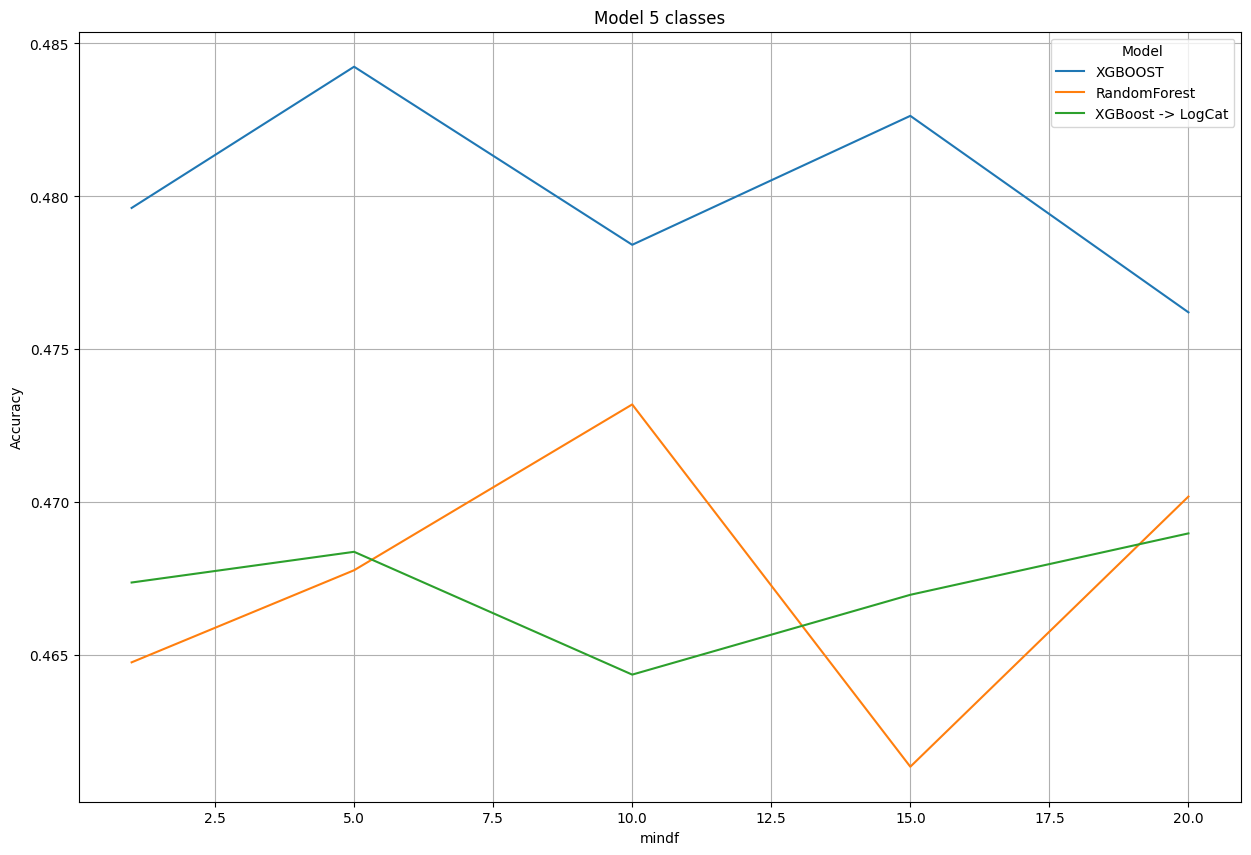

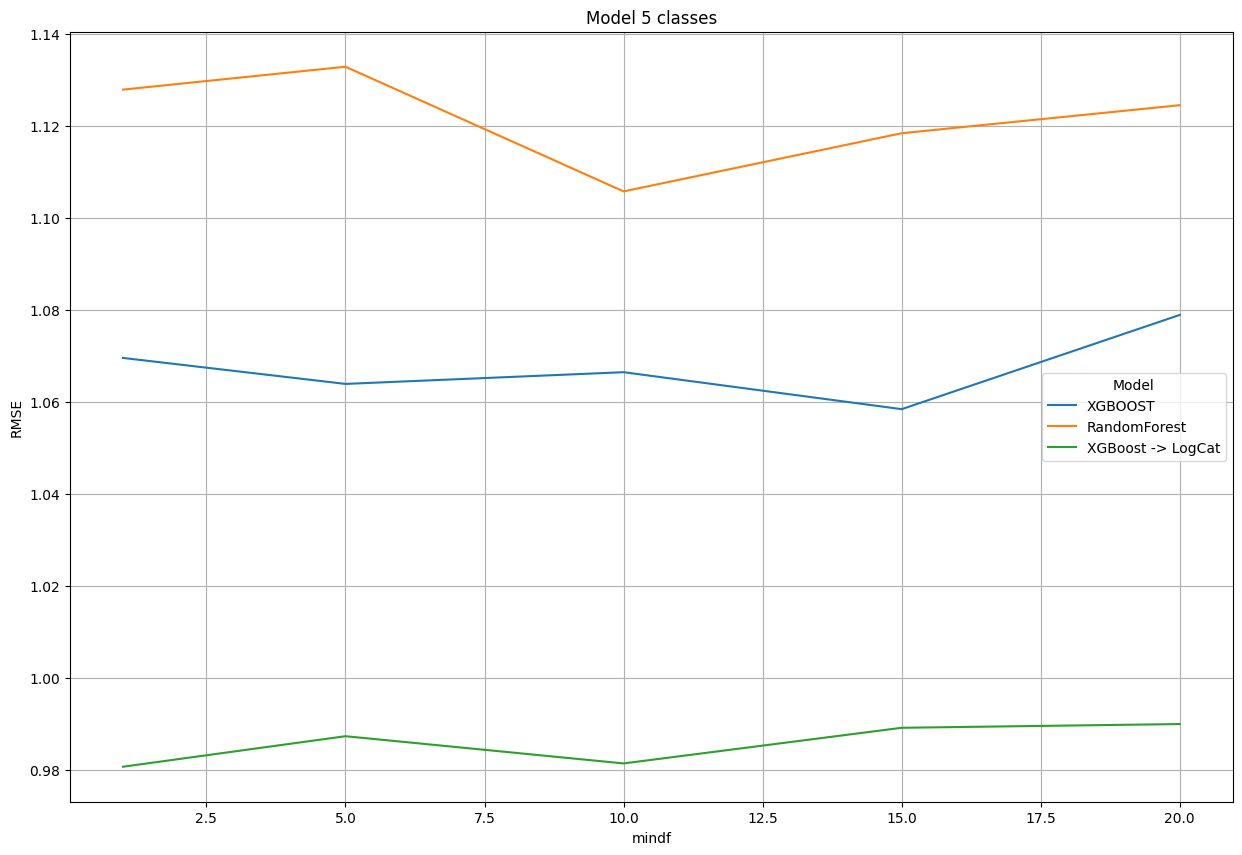

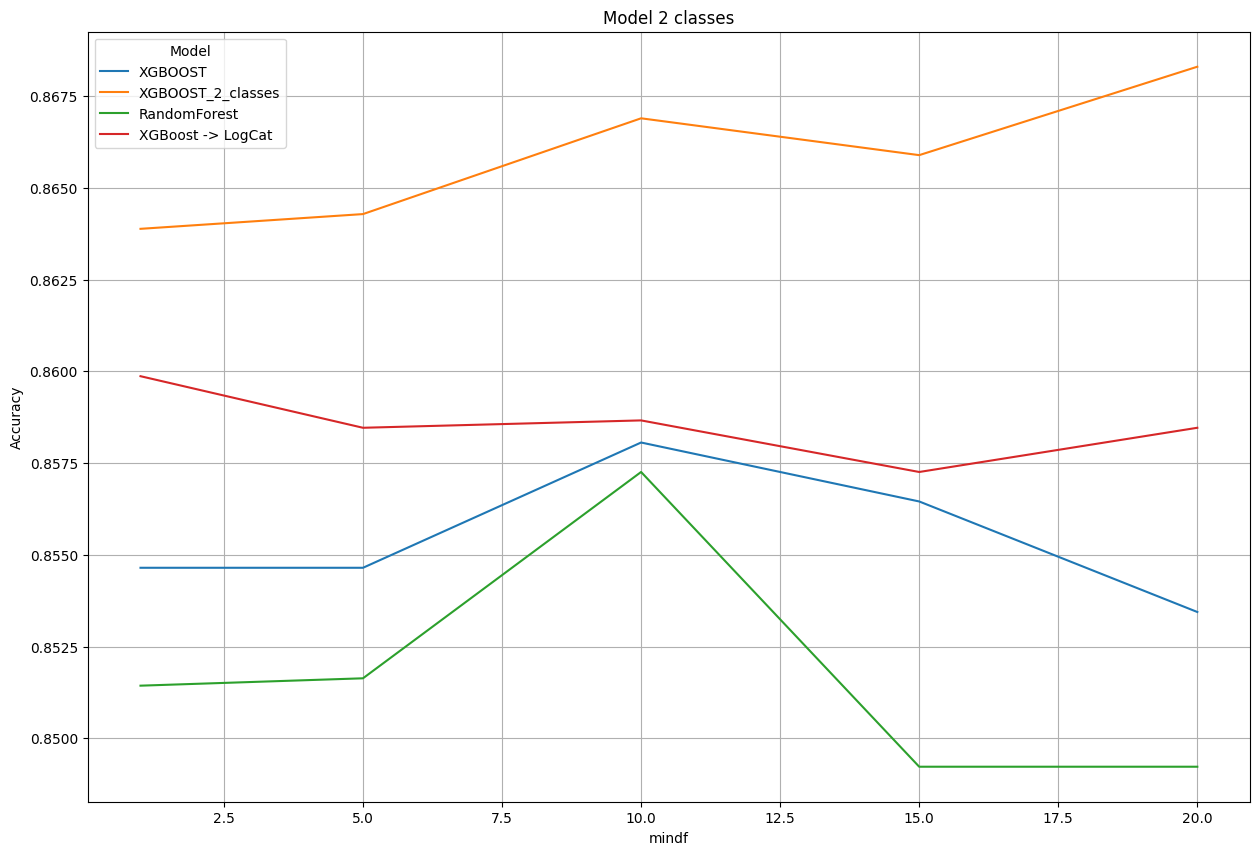

In [114]:
mask = (df["is_vectorize"]==True) & (df["is_daydiff"]==True) & (df["is_meta"] == True & (df["Model"]!="XGBOOST_TRAIN"))

# 5 class
mask2 = df["n_class"] == 5
plt.figure(figsize=(15, 10))
sns.lineplot(x="mindf", y="Accuracy", hue="Model" , data=df[mask & mask2])
plt.grid()
plt.title("Model 5 classes")

mask2 = df["n_class"] == 5
plt.figure(figsize=(15, 10))
sns.lineplot(x="mindf", y="RMSE", hue="Model" , data=df[mask & mask2])
plt.grid()
plt.title("Model 5 classes")

# 2 class
mask2 = df["n_class"] == 2
plt.figure(figsize=(15, 10))
sns.lineplot(x="mindf", y="Accuracy", hue="Model" , data=df[mask & mask2])
plt.grid()
plt.title("Model 2 classes")

display(df[mask & mask2])
# plt.ylim(0,1)
# df_2_class = df[(df["n_class"]==2) & (df["is_vectorize"]==True) & (df["is_daydiff"]==True) & (df["is_meta"] == True)]
# df_5_class = df[(df["n_class"]==5)  & (df["is_vectorize"]==True) & (df["is_daydiff"]==True) & (df["is_meta"] == True)]
# model_df_2_class = df_2_class.Model.unique().tolist()
# model_df_5_class = df_5_class.Model.unique().tolist()
# model_list = list(set(model_df_2_class) & set(model_df_5_class))
# col_to_merge = ["Model", "split_size", "mindf", "is_vectorize", "is_daydiff", "is_meta"]
# df_merged = df_2_class.merge(df_5_class, on=col_to_merge, suffixes=("_2_class", "_5_class"))
# df_merged["Difference"] = df_merged["Accuracy_2_class"] - df_merged["Accuracy_5_class"]
# display(df_merged[["Model", "Accuracy_5_class", "Accuracy_2_class", "Difference"]])

# df_melt = df_merged.melt(id_vars="Model", value_vars=["Accuracy_2_class", "Accuracy_5_class"], var_name="Number of class", value_name="Accuracy [%]")
# df_melt.replace({"Accuracy_2_class":2, "Accuracy_5_class":5}, inplace=True)
# plt.figure(figsize=(15, 10))
# sns.barplot(x="Model", y="Accuracy [%]", hue="Number of class" , data=df_melt)
# plt.ylim(0,1)

<h2>Solution 2 class vs 5 class</h2>

,Model,Accuracy_5_class,Accuracy_2_class,Difference
0,XGBOOST,0.484240,0.854648,0.370408
1,XGBOOST_TRAIN,0.725055,0.915931,0.190875
2,RandomForest,0.467778,0.851636,0.383859
3,xGboot->LogCat,0.468380,0.858462,0.390082


C:\Users\Steffen\AppData\Local\Temp\ipykernel_28420\481009673.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_melt.replace({"Accuracy_2_class":2, "Accuracy_5_class":5}, inplace=True)


(0.0, 1.0)

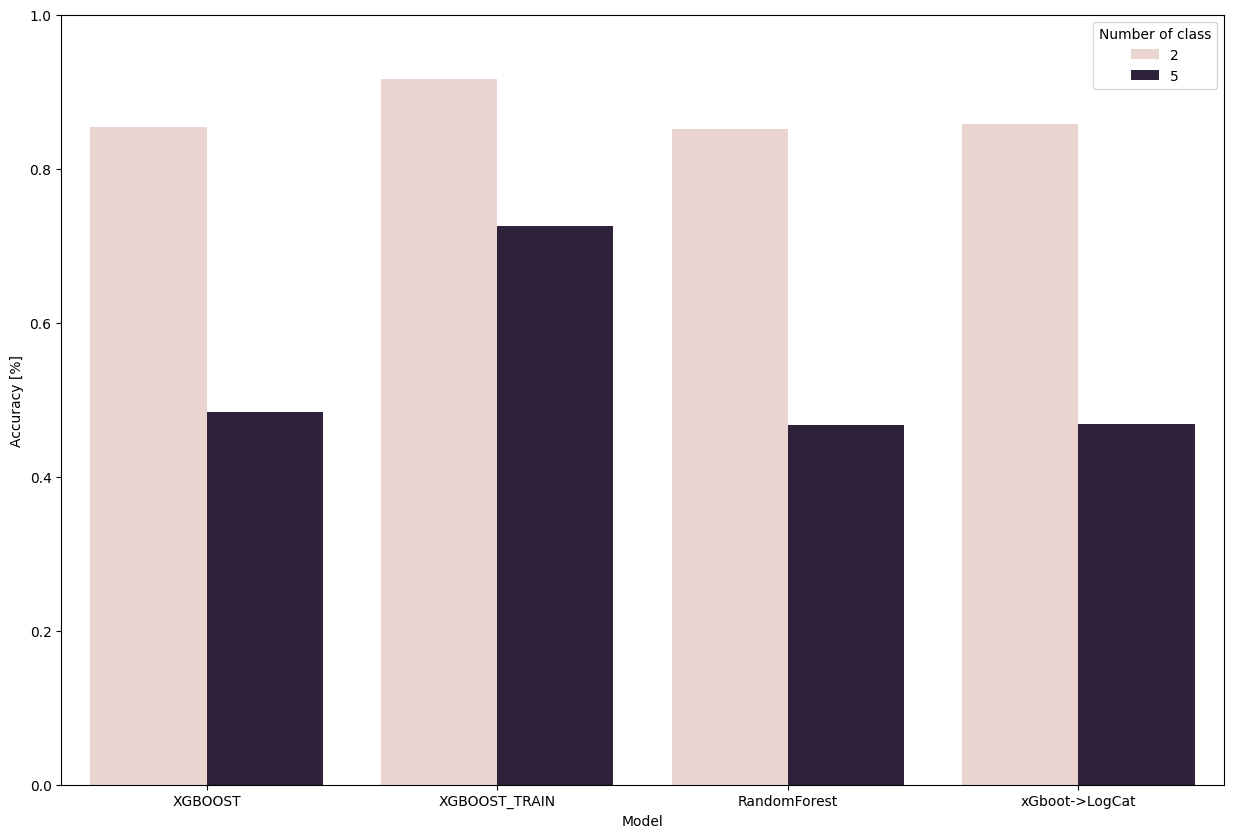

In [ ]:
df_2_class = df[(df["n_class"]==2) & (df["mindf"]==5) & (df["is_vectorize"]==True) & (df["is_daydiff"]==True) & (df["is_meta"] == True)]
df_5_class = df[(df["n_class"]==5) & (df["mindf"]==5) & (df["is_vectorize"]==True) & (df["is_daydiff"]==True) & (df["is_meta"] == True)]
model_df_2_class = df_2_class.Model.unique().tolist()
model_df_5_class = df_5_class.Model.unique().tolist()
model_list = list(set(model_df_2_class) & set(model_df_5_class))
col_to_merge = ["Model", "split_size", "mindf", "is_vectorize", "is_daydiff", "is_meta"]
df_merged = df_2_class.merge(df_5_class, on=col_to_merge, suffixes=("_2_class", "_5_class"))
df_merged["Difference"] = df_merged["Accuracy_2_class"] - df_merged["Accuracy_5_class"]
display(df_merged[["Model", "Accuracy_5_class", "Accuracy_2_class", "Difference"]])

df_melt = df_merged.melt(id_vars="Model", value_vars=["Accuracy_2_class", "Accuracy_5_class"], var_name="Number of class", value_name="Accuracy [%]")
df_melt.replace({"Accuracy_2_class":2, "Accuracy_5_class":5}, inplace=True)
plt.figure(figsize=(15, 10))
sns.barplot(x="Model", y="Accuracy [%]", hue="Number of class" , data=df_melt)
plt.ylim(0,1)




<h2>Partir de 5 classe pour en obtenir 2 vs 2 classes dès le train test</h2>

<h2>Impact de La vectorisation</h2>

C:\Users\Steffen\AppData\Local\Temp\ipykernel_28420\65923391.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_class["State"] = df_5_class.apply(make_state, axis=1)
C:\Users\Steffen\AppData\Local\Temp\ipykernel_28420\65923391.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_class["State"] = df_5_class.apply(make_state, axis=1)


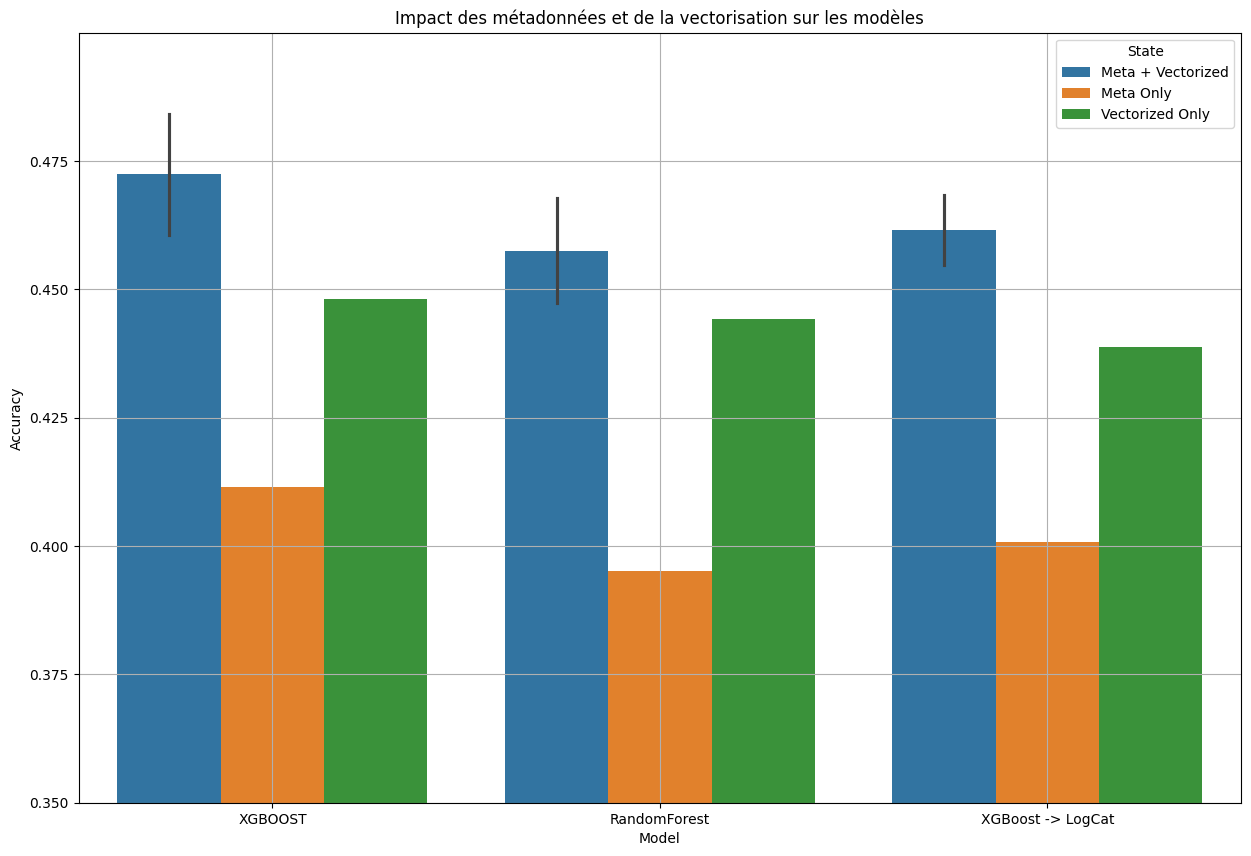

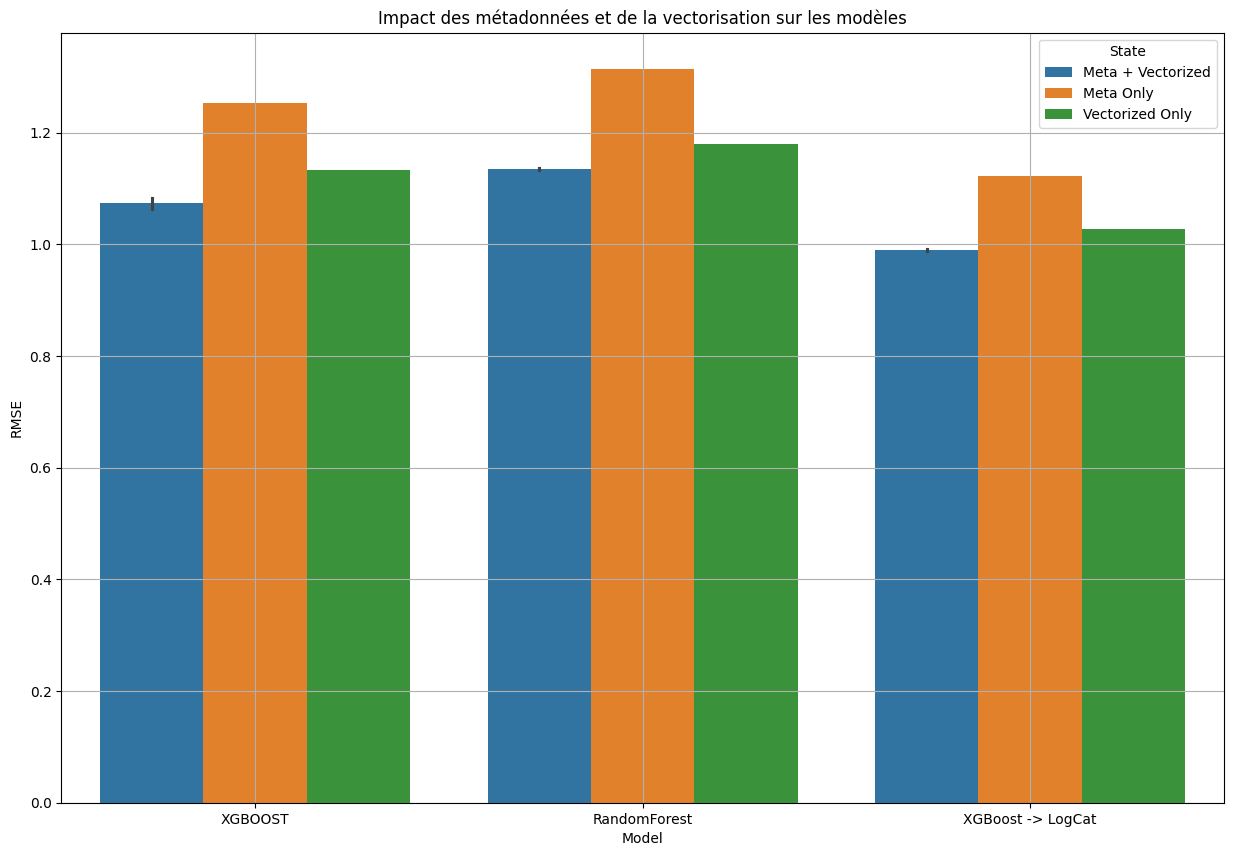

In [91]:
# df_5_class = df[(df["n_class"]==5) & (df["mindf"]==5)]
# model_df_2_class = df_2_class.Model.unique().tolist()
# model_df_5_class = df_5_class.Model.unique().tolist()
# model_list = list(set(model_df_2_class) & set(model_df_5_class))
# col_to_merge = ["Model", "split_size", "mindf", "is_vectorize", "is_daydiff", "is_meta"]
# df_merged = df_2_class.merge(df_5_class, on=col_to_merge, suffixes=("_2_class", "_5_class"))
# df_merged["Difference"] = df_merged["Accuracy_2_class"] - df_merged["Accuracy_5_class"]
# display(df_merged[["Model", "Accuracy_5_class", "Accuracy_2_class", "Difference"]])

# df_melt = df_merged.melt(id_vars="Model", value_vars=["Accuracy_2_class", "Accuracy_5_class"], var_name="Number of class", value_name="Accuracy [%]")
# df_melt.replace({"Accuracy_2_class":2, "Accuracy_5_class":5}, inplace=True)
# plt.figure(figsize=(15, 10))
# sns.barplot(x="Model", y="Accuracy [%]", hue="Number of class" , data=df_melt)
# plt.ylim(0,1)

df_5_class = df[(df["n_class"]==5) & (df["mindf"]==5) & (df["Model"]!="XGBOOST_TRAIN")]
df_5_class
def make_state(x):
    if (x["is_meta"]==True) & (x["is_vectorize"]==False):
        state = "Meta Only"
    elif (x["is_meta"]==True) & (x["is_vectorize"]==True):
        state = "Meta + Vectorized"
    elif (x["is_meta"]==False) & (x["is_vectorize"]==True):
        state = "Vectorized Only"
    return(state)

df_5_class["State"] = df_5_class.apply(make_state, axis=1)
plt.figure(figsize=(15, 10))
sns.barplot(x="Model", y="Accuracy", hue="State" , data=df_5_class)
plt.title("Impact des métadonnées et de la vectorisation sur les modèles")
plt.grid()
plt.yticks(ticks=np.arange(0, 0.5, 0.025))
plt.ylim(0.35, 0.5)

df_5_class["State"] = df_5_class.apply(make_state, axis=1)
plt.figure(figsize=(15, 10))
sns.barplot(x="Model", y="RMSE", hue="State" , data=df_5_class)
plt.title("Impact des métadonnées et de la vectorisation sur les modèles")
plt.grid()
# plt.yticks(ticks=np.arange(0, 0.5, 0.025))
# plt.ylim(0.35, 0.5)

C:\Users\Steffen\AppData\Local\Temp\ipykernel_28420\3608264804.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_class["State"] = df_5_class.apply(make_state, axis=1)
C:\Users\Steffen\AppData\Local\Temp\ipykernel_28420\3608264804.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_class["State"] = df_5_class.apply(make_state, axis=1)


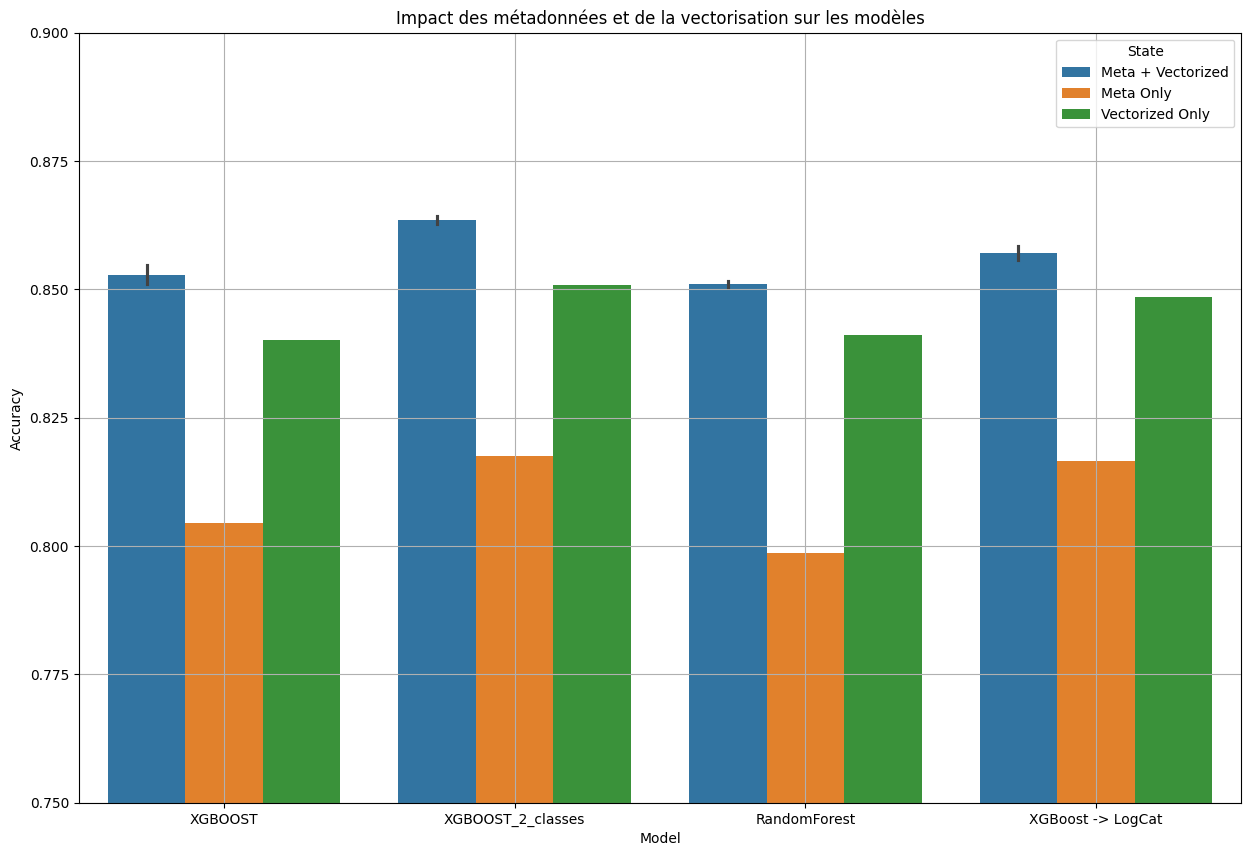

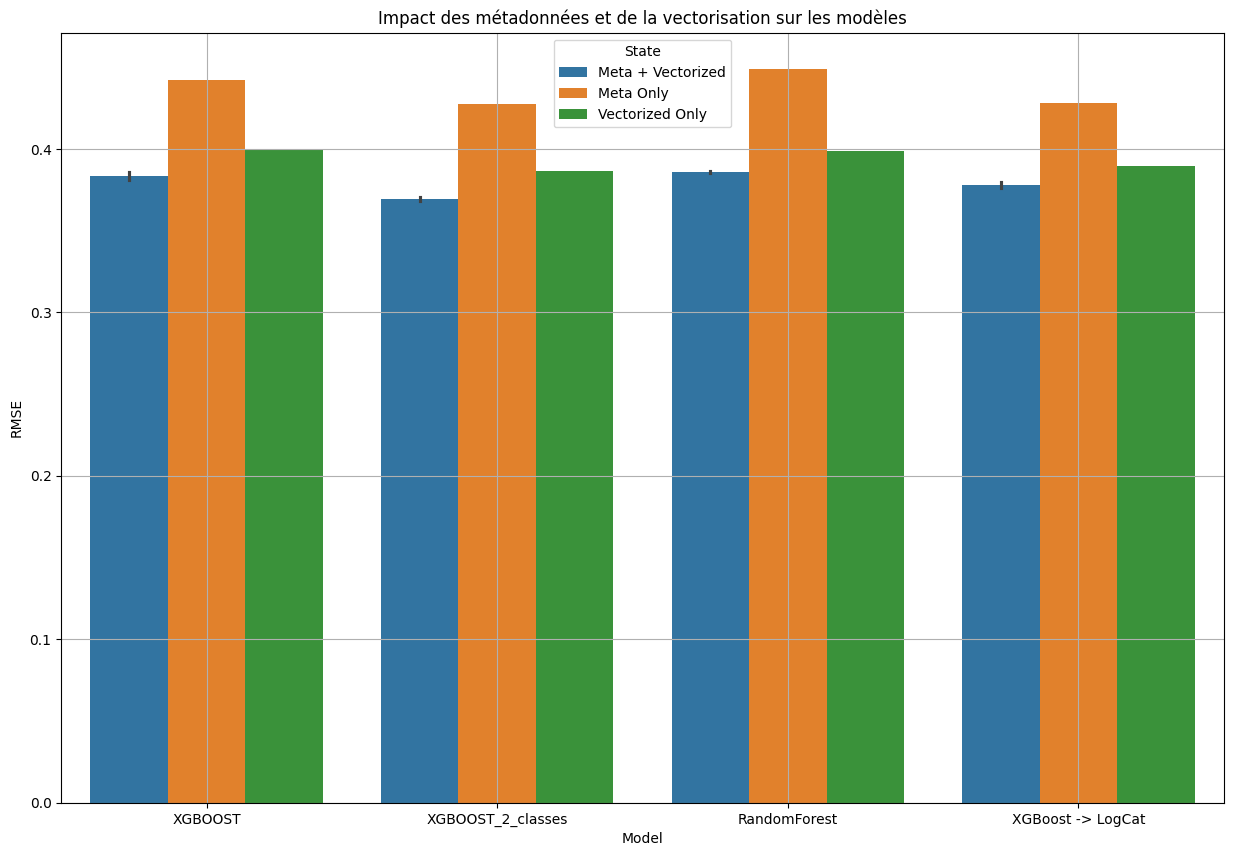

In [117]:
# df_5_class = df[(df["n_class"]==5) & (df["mindf"]==5)]
# model_df_2_class = df_2_class.Model.unique().tolist()
# model_df_5_class = df_5_class.Model.unique().tolist()
# model_list = list(set(model_df_2_class) & set(model_df_5_class))
# col_to_merge = ["Model", "split_size", "mindf", "is_vectorize", "is_daydiff", "is_meta"]
# df_merged = df_2_class.merge(df_5_class, on=col_to_merge, suffixes=("_2_class", "_5_class"))
# df_merged["Difference"] = df_merged["Accuracy_2_class"] - df_merged["Accuracy_5_class"]
# display(df_merged[["Model", "Accuracy_5_class", "Accuracy_2_class", "Difference"]])

# df_melt = df_merged.melt(id_vars="Model", value_vars=["Accuracy_2_class", "Accuracy_5_class"], var_name="Number of class", value_name="Accuracy [%]")
# df_melt.replace({"Accuracy_2_class":2, "Accuracy_5_class":5}, inplace=True)
# plt.figure(figsize=(15, 10))
# sns.barplot(x="Model", y="Accuracy [%]", hue="Number of class" , data=df_melt)
# plt.ylim(0,1)

df_5_class = df[(df["n_class"]==2) & (df["mindf"]==5) & (df["Model"]!="XGBOOST_TRAIN")]
df_5_class
def make_state(x):
    if (x["is_meta"]==True) & (x["is_vectorize"]==False):
        state = "Meta Only"
    elif (x["is_meta"]==True) & (x["is_vectorize"]==True):
        state = "Meta + Vectorized"
    elif (x["is_meta"]==False) & (x["is_vectorize"]==True):
        state = "Vectorized Only"
    return(state)

df_5_class["State"] = df_5_class.apply(make_state, axis=1)
plt.figure(figsize=(15, 10))
sns.barplot(x="Model", y="Accuracy", hue="State" , data=df_5_class)
plt.title("Impact des métadonnées et de la vectorisation sur les modèles")
plt.grid()
plt.yticks(ticks=np.arange(0.75, 0.9, 0.025))
plt.ylim(0.75, 0.9)

df_5_class["State"] = df_5_class.apply(make_state, axis=1)
plt.figure(figsize=(15, 10))
sns.barplot(x="Model", y="RMSE", hue="State" , data=df_5_class)
plt.title("Impact des métadonnées et de la vectorisation sur les modèles")
plt.grid()
# plt.yticks(ticks=np.arange(0, 0.5, 0.025))
# plt.ylim(0.35, 0.5)

Impact du day diff

C:\Users\Steffen\AppData\Local\Temp\ipykernel_28420\814791940.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5_class["State"] = df_5_class.apply(make_state, axis=1)


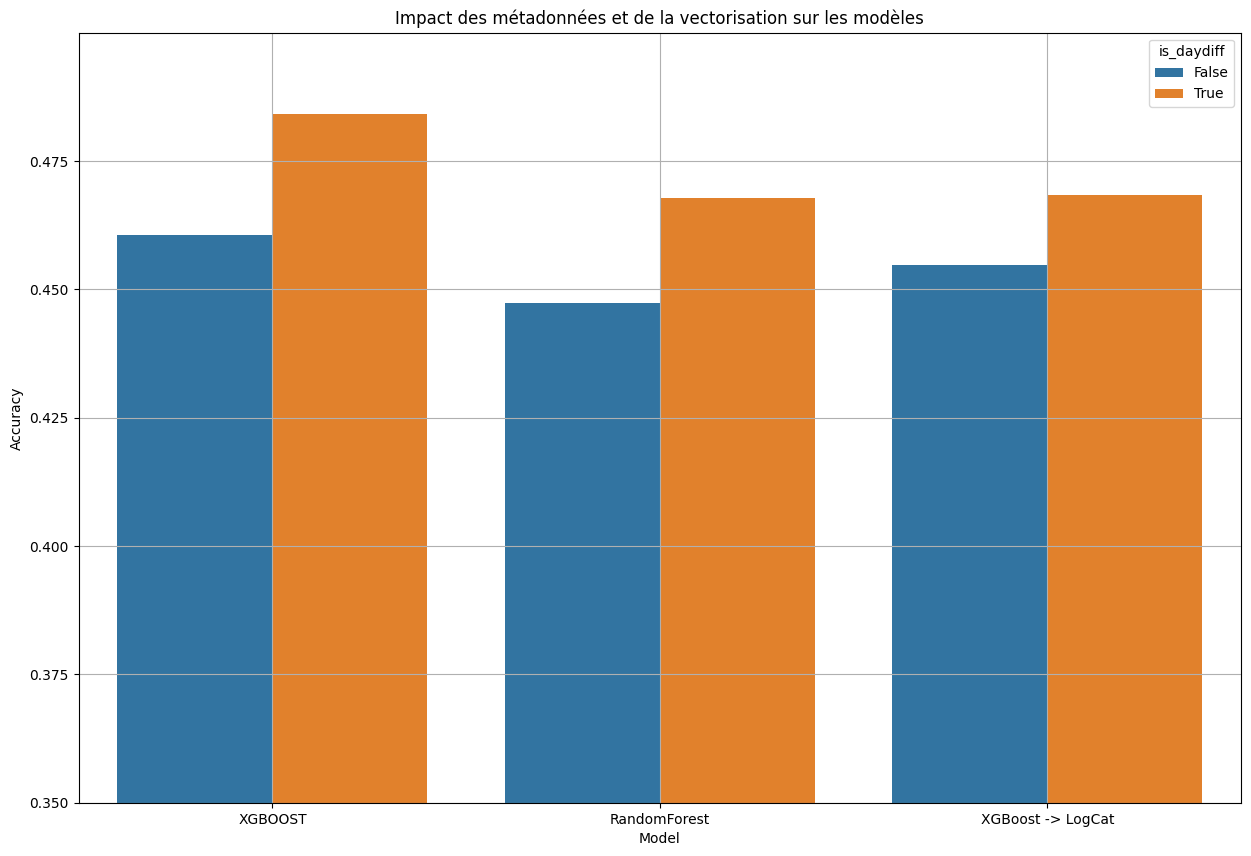

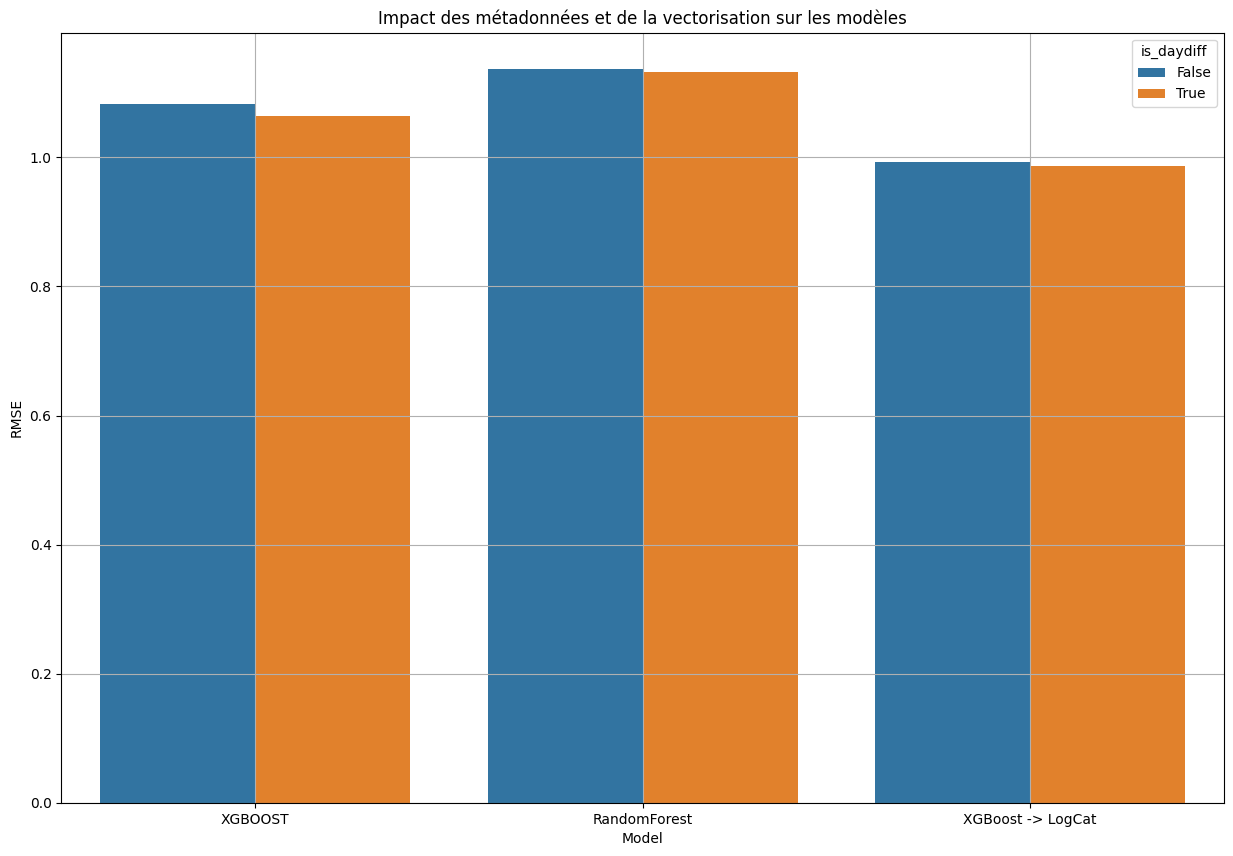

In [ ]:
df_5_class = df[(df["n_class"]==5) & (df["mindf"]==5) & (df["Model"]!="XGBOOST_TRAIN") & (df["is_vectorize"]==True) & (df["is_meta"]==True)]

def make_state(x):
    if (x["is_meta"]==True) & (x["is_vectorize"]==False):
        state = "Meta Only"
    elif (x["is_meta"]==True) & (x["is_vectorize"]==True):
        state = "Meta + Vectorized"
    elif (x["is_meta"]==False) & (x["is_vectorize"]==True):
        state = "Vectorized Only"
    return(state)

# df_5_class["State"] = df_5_class.apply(make_state, axis=1)
plt.figure(figsize=(15, 10))
sns.barplot(x="Model", y="Accuracy", hue="is_daydiff" , data=df_5_class)
plt.title("Impact des métadonnées et de la vectorisation sur les modèles")
plt.grid()
plt.yticks(ticks=np.arange(0, 0.5, 0.025))
plt.ylim(0.35, 0.5)

df_5_class["State"] = df_5_class.apply(make_state, axis=1)
plt.figure(figsize=(15, 10))
sns.barplot(x="Model", y="RMSE", hue="is_daydiff" , data=df_5_class)
plt.title("Impact des métadonnées et de la vectorisation sur les modèles")
plt.grid()

